# On parameterized scientific computing

Scientific computing often involves the optimization of feasible solutions.
This can be done by parameterizing a scientific system of interest.
For example, the governing equations can serve as parameterized constraints in physics-informed deep learning.
A suitable ML algorithm can be found with the optimization of trainable parameters.

## Optimization of an ODE system

Let's take the Lotka-Volterra equations, i.e. the predator–prey model, as an example.

In [1]:
function lotka_volterra(u, p, t)
    α, β, δ, γ = p
    🐰, 🦊 = u
    return [🐰 * (α - β * 🦊), -🦊 * (γ - δ * 🐰)]
end

lotka_volterra (generic function with 1 method)

In [2]:
using OrdinaryDiffEq, Plots, Flux, Solaris, Optim, Test
pyplot()

Plots.PyPlotBackend()

We define the initial computing parameters.

In [3]:
u0 = [1.0, 1.0] # initial number of 🐰 & 🦊
p = [1.5, 1.0, 1.0, 3.0] # α, β, δ, γ
tspan = (0.0, 10.0) # time span

(0.0, 10.0)

An ODE is formulated and solved.

In [4]:
prob = ODEProblem(lotka_volterra, u0, tspan, p)
sol = solve(prob, RK4())

retcode: Success
Interpolation: 3rd order Hermite
t: 92-element Vector{Float64}:
  0.0
  0.04096249791634249
  0.09492579003001751
  0.16461733554330665
  0.24797720114853214
  0.3449262422149134
  0.4537904955484962
  0.5737061081773743
  0.7031638324746781
  0.8402918600435778
  0.9817450083437056
  1.1227116783798825
  1.2581933240219227
  ⋮
  8.959979437859552
  9.034371029031744
  9.113913614407997
  9.196089937915469
  9.293633301381055
  9.384149364267792
  9.479480960296376
  9.576558652883358
  9.680435884143673
  9.791897762620573
  9.91462669172736
 10.0
u: 92-element Vector{Vector{Float64}}:
 [1.0, 1.0]
 [1.0223548367370965, 0.9217512759415004]
 [1.0574508739228143, 0.8292101153731414]
 [1.1121764508851177, 0.7255574058887769]
 [1.1916495092752522, 0.6218989991888514]
 [1.303909799625298, 0.5246476393700237]
 [1.4569993145238618, 0.43972491463803964]
 [1.6618533655305672, 0.36981634327281665]
 [1.9307872983460972, 0.31627683514137994]
 [2.277283674881124, 0.2794969925497435

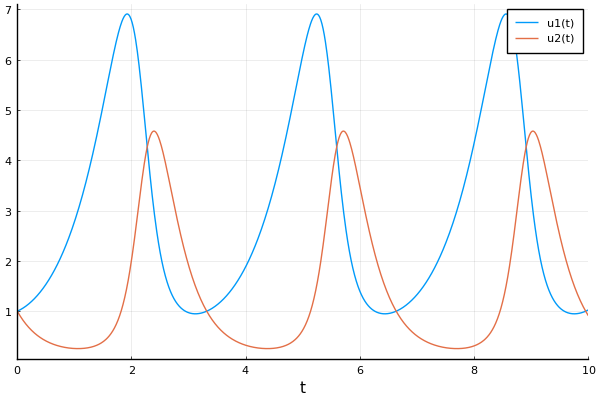

In [5]:
plot(sol)

Now suppose that we would like to maintain the stability of this ecosystem.

In [6]:
function loss(p)
    sol = solve(prob, Midpoint(), p = p, saveat = tspan[1]:0.2:tspan[2])
    loss = sum(abs2, sol .- 1)
    return loss, sol
end

loss (generic function with 1 method)

In [7]:
callback = function (p, l, pred)
    println("loss: $l")
    return false
end

#1 (generic function with 1 method)

In [8]:
res = sci_train(loss, p, opt = ADAM(), cb = callback, maxiters = 1000)

loss: 508.977407435795
loss: 506.6485126519795
loss: 504.33100722834445
loss: 502.025282136744
loss: 499.73120841909883
loss: 497.4491856610699
loss: 495.1791540981147
loss: 492.92127568550245
loss: 490.6755331429782
loss: 488.44210216057587
loss: 486.22126906736133
loss: 484.0129833209825
loss: 481.81715588158147
loss: 479.6339653753713
loss: 477.46344951635035
loss: 475.3058687084652
loss: 473.16099100989544
loss: 471.0290559304323
loss: 468.90996326237695
loss: 466.80380102785597
loss: 464.7104745334764
loss: 462.6301769169189
loss: 460.5627930213823
loss: 458.508412366508
loss: 456.46690624357666
loss: 454.438378191105
loss: 452.4226527731579
loss: 450.4198839513056
loss: 448.4298642498637
loss: 446.4528145307495
loss: 444.48847111229134
loss: 442.5366560333287
loss: 440.59761972464395
loss: 438.67122649508707
loss: 436.7574489235614
loss: 434.8560364628742
loss: 432.9670936572587
loss: 431.09040879317433
loss: 429.2260690864799
loss: 427.37385909297075
loss: 425.5339696397517
loss

u: 4-element Vector{Float64}:
 1.477702460359724
 1.4253466629002052
 1.5129365271058377
 2.364040632291803

In [9]:
res = sci_train(loss, res.u, opt = LBFGS(), cb = callback, maxiters = 1000)

loss: 34.68865090947622
loss: 34.469801626941866
loss: 34.25200866397073
loss: 34.03535623510534
loss: 33.8197809958944
loss: 33.60533078612326
loss: 33.39202031782987
loss: 33.17985506950686
loss: 32.96884212567458
loss: 32.7590066521233
loss: 32.5503572888969
loss: 32.34288784941434
loss: 32.13661311498325
loss: 31.931541160345283
loss: 31.727682913513082
loss: 31.524979333174617
loss: 31.323537235305196
loss: 31.12329617166831
loss: 30.924289142867057
loss: 30.726488796897016
loss: 30.529926804070783
loss: 30.334629946225064
loss: 30.140529396878016
loss: 29.947680406219895
loss: 29.75606639107308
loss: 29.56570332768712
loss: 29.37659072274691
loss: 29.18869080972411
loss: 29.002054076792028
loss: 28.816656225347984
loss: 28.63249071026209
loss: 28.44955883646082
loss: 28.267862983792106
loss: 28.08737850683648
loss: 27.90812445814313
loss: 27.730076750590033
loss: 27.553249561504646
loss: 27.377609272879074
loss: 27.203173781696698
loss: 27.029971721010277
loss: 26.857912713348846

u: 4-element Vector{Float64}:
 1.6684211545742487
 1.6700559895827394
 1.892090733357147
 1.9247044939916682

Let's take a look at the evolution process.

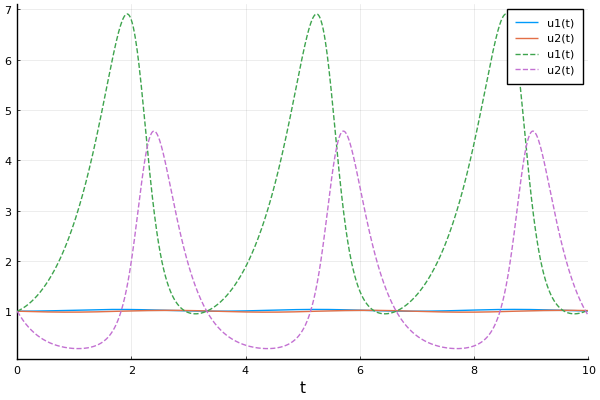

In [10]:
prob = ODEProblem(lotka_volterra, u0, tspan, res.u)
sol1 = solve(prob, Midpoint())
plot(sol1)
plot!(sol, line=:dash)

The strategy can be implemented in other systems.
A neural network is a typical parameterized architecture.
If NN is built to approximate the numerical solution of a physical system directly, by training of the NN parameters, we are getting closer to accurate solutions.
Similarly, if NN is used to surrogate a numerical scheme, effective training should lead to good numerical scheme.

## Optimization of a numerical scheme

Let's consider a specific task, i.e. the integrator for ODEs.

Runge-Kutta methods focus on a family of initial value problems.

$y'=f(t,y), \quad y(t_0)=y_0$

Runge-Kutta methods don't care about details of the right-hand side $f$, so it can be as generic as possible, e.g. scalar/vector, time homogeneous/inhomogeneous, etc.

In our implementation, we hope to keep this feature. Any function can be passed to the neural integrator as its argument.

Let's consider the scalar equation first.

- simple one: $f = -e^{-t} \rightarrow y=e^{-t}+C$ -> testing
- complex one: $f = -ye^{-t}$ -> training

In [11]:
f(y, t) = -exp(-t) * y
f(y, p, t) = -exp(-t) * y # parameterized equation for DifferentialEquations.jl

f (generic function with 2 methods)

#### Data generation

Then we prepare the dataset.
It can be produced following theoretical solution (if it exists) or by numerical solver.

In [12]:
h = 0.2 # time step
X = randn(Float32, 1, 1000)
#T = collect(1:49/1000:50)[1:end-1] |> permutedims
T = rand(Float32, 1, 1000) * 100

Y = zeros(Float32, 1, 1000)
for i in axes(X, 2)
    u0 = X[1, i]
    t0 = T[1, i]
    C = u0 - exp(-t0)
    Y[1, i] = exp(-(t0+h)) + C
end

Y1 = zeros(Float32, 1, 1000)
for i in axes(X, 2)
    u0 = X[1, i]
    tspan = (T[1, i], T[1, i] + h)
    prob = ODEProblem(f, u0, tspan)
    sol = solve(prob, Tsit5(), dt = h, adaptive=false)
    Y1[1, i] = sol.u[end]
end

@show Y1 ≈ Y # the two results shoud be equivalent in the sense of numerical error
Y .= Y1

Y1 ≈ Y = false


1×1000 Matrix{Float32}:
 1.43652  0.618143  -0.158704  1.06904  …  -0.914014  0.663441  1.66254

#### Model architecture

The key is to parameterized the numerical scheme.

We first follow the solution algorithm in a multi-step Runge-Kutta scheme, and define the learnable parameters.

![](nn.png)

In [13]:
# p[9]
# p[1:3]: a21, a31, a32
# p[4:6]: b
# p[7:9]: c

function init_params(p, init=:allzero)
    eval(init)(p)
end

function allzero(p)
    p .= 0. .+ rand(Float32, length(p)) / length(p)
end

function kutta3(p)
    a21 = 1/2
    a31 = -1
    a32 = 2
    b1 = 1/6
    b2 = 2/3
    b3 = 1/6
    c1 = 0
    c2 = 1/2
    c3 = 1
    
    p .= Float32[a21, a31, a32, b1, b2, b3, c1, c2, c3] .+ rand(Float32, length(p)) / length(p)
end

kutta3 (generic function with 1 method)

In [14]:
p = Array{Float32}(undef, 9)
#init_params(p, :allzero)
init_params(p, :kutta3)

9-element Vector{Float32}:
  0.51561505
 -0.8925701
  2.074875
  0.2135733
  0.6846349
  0.27209887
  0.038508788
  0.58048344
  1.0000612

In [15]:
# our neural RK model
# it's nothing but just parameter flows
function model(p)
    k1 = @. f(X, T)
    k2 = @. f(X + h * p[1] * k1, T + p[8] * h)
    k3 = @. f(X + h * (p[2] * k1 + p[3] * k2), T + p[9] * h)
    
    return @. X + h * (p[4] * k1 + p[5] * k2 + p[6] * k3)
end

function loss(p)
    Y1 = model(p)
    return sum((Y .- Y1).^2) + (sum(p[4:6]) - 1.0)^2 + (p[1] - p[8])^2 + (p[2] + p[3] - p[9])^2 # the parameters should satisfy the constraints
end

loss (generic function with 1 method)

In [16]:
cb = function (p, l)
    display(l)
    return false
end

#3 (generic function with 1 method)

In [17]:
res = sci_train(loss, p, ADAM(), cb = cb, maxiters = 200)

0.06998495938869795

0.06748934890048383

0.06504195910842259

0.062643595495465

0.060295031597964024

0.05799689335188374

0.05574982411163753

0.0535543881286611

0.05141107658370721

0.04932044849232706

0.04728281588191488

0.04529839056987434

0.043367572605847234

0.04149022155447283

0.03966667909444211

0.03789669127290912

0.03618026712931981

0.034517233906196376

0.03290729189627557

0.031350157198605955

0.029845331833214063

0.028392470218918345

0.026990834956968177

0.025639929678546686

0.024339029997299255

0.023087268717661036

0.02188395332571251

0.020728118153932613

0.019618912809776384

0.01855529940958043

0.017536291361039718

0.016560866617710727

0.015627874086357532

0.014736280820457807

0.013884833091806246

0.013072496090391775

0.012298077754472071

0.011560384095929563

0.010858249637670219

0.010190471679456008

0.00955594963057802

0.008953469416736685

0.00838190114663746

0.007840133716519197

0.0073270294490481655

0.006841423840799653

0.0063823157196575015

0.005948612167243838

0.005539283623071695

0.00515324249733677

0.00478959451341194

0.004447308823240807

0.004125466124704786

0.003823149599182681

0.0035394677418058625

0.0032735351052910907

0.003024514494721093

0.002791608621038137

0.002574005438261741

0.0023709198542172555

0.002181641971257975

0.002005423273828699

0.0018415888140676882

0.00168944126593879

0.001548347744930356

0.0014176821063765542

0.001296845530567593

0.0011852441519475294

0.001082316639665588

0.0009875478779191667

0.0009003954392955096

0.0008203888534317929

0.0007470460388211244

0.0006799168610901905

0.000618584082629982

0.0005626229356491042

0.0005116562041053388

0.00046531683812645584

0.000423260334844314

0.00038514422849551615

0.0003506655591942799

0.0003195344779676666

0.00029147455199396747

0.000266233443656564

0.00024357326217910348

0.0002232600440020597

0.00020509480079921542

0.00018887530498280236

0.0001744240446796807

0.0001615781481854047

0.00015017925737606625

0.000140090675215783

0.00013117938112468431

0.0001233269159819691

0.00011642091623911347

0.00011036517278346845

0.00010506349563788733

0.0001004398733264131

9.641301245248053e-5

9.29191202124536e-5

8.989423771908478e-5

8.728423636536549e-5

8.503920242414195e-5

8.311316148503177e-5

8.146582144946958e-5

8.0064151091315e-5

7.887225457885114e-5

7.786529890030377e-5

7.70165866972609e-5

7.630336619068507e-5

7.570756095029827e-5

7.521112667138551e-5

7.479789006745874e-5

7.445631224759583e-5

7.417326434198676e-5

7.394078421525441e-5

7.374872564249723e-5

7.35898960206067e-5

7.345780523414214e-5

7.334812161016052e-5

7.32552405210821e-5

7.317563862984599e-5

7.310656959019443e-5

7.30447842435762e-5

7.298747783415102e-5

7.293505430696076e-5

7.28837190831393e-5

7.283378967185832e-5

7.278482290326216e-5

7.273493464733462e-5

7.268394414487104e-5

7.26325513503558e-5

7.258026735190075e-5

7.252605773948284e-5

7.247078522676642e-5

7.241456595957384e-5

7.235667418214022e-5

7.22984557649952e-5

7.223884046049052e-5

7.21794017353214e-5

7.211919513915582e-5

7.205831427133128e-5

7.199840303451736e-5

7.193760567048978e-5

7.18769880605131e-5

7.18166087478742e-5

7.175693195430493e-5

7.16969342144388e-5

7.163829628532514e-5

7.157942873743827e-5

7.152100653290504e-5

7.146422653939257e-5

7.140703359080114e-5

7.135119631959234e-5

7.129563635890214e-5

7.124034137512923e-5

7.118637462469256e-5

7.113281904276698e-5

7.107963744733624e-5

7.102660443222158e-5

7.097404492725342e-5

7.092210381726057e-5

7.087057932486463e-5

7.081969220340382e-5

7.076885795274822e-5

7.071875280887139e-5

7.066840489343716e-5

7.06187137770539e-5

7.056856364586039e-5

7.051939505041028e-5

7.046980934697248e-5

7.042053792962827e-5

7.037157713046685e-5

7.032235465061478e-5

7.027320173145108e-5

7.022405032157685e-5

7.017481086713511e-5

7.012604245958153e-5

7.007665408951244e-5

7.002745164473177e-5

6.997815157500317e-5

6.992896620513939e-5

6.988014527117432e-5

6.983106252826107e-5

6.978143888238789e-5

6.97319739323847e-5

6.968272294509431e-5

6.963271347581757e-5

6.958310142313867e-5

6.953343492513582e-5

6.948364705872118e-5

6.94334000564197e-5

6.938362685391308e-5

6.933316253185837e-5

6.928288483273081e-5

6.923298054448297e-5

6.918238451042226e-5

6.913171227178978e-5

6.908090180163277e-5

6.903005334475836e-5

6.903005334475836e-5

u: 9-element Vector{Float32}:
  0.54665995
 -0.9535183
  2.0139785
  0.15898462
  0.6287176
  0.21546736
  0.038508788
  0.5466351
  1.0604819

In [18]:
res = sci_train(loss, res.u, LBFGS(), cb = cb, maxiters = 1000)

6.897912227715286e-5

2.705377826295774e-5

1.5743242166017763e-6

2.8759246657008668e-8

7.460751111985466e-9

7.460175853679883e-9

7.336611371490535e-9

4.70615599289529e-9

7.597637424842585e-11

3.469139403066748e-11

3.396746099424946e-11

3.3958585009012374e-11

3.394421524608452e-11

3.394421524608452e-11

u: 9-element Vector{Float32}:
  0.52392346
 -0.9559806
  2.0076685
  0.2007339
  0.64315814
  0.15610795
  0.038508788
  0.52392346
  1.051688

#### Test the trained model

In [19]:
function predict(t, x, h, f, p)
    k1 = f(x, t)
    k2 = f(x + h * p[1] * k1, t + p[8] * h)
    k3 = f(x + h * (p[2] * k1 + p[3] * k2), t + p[9] * h)
    
    return @. x + h * (p[4] * k1 + p[5] * k2 + p[6] * k3)
end

predict (generic function with 1 method)

In [20]:
f1(y, t) = -2 * exp(-2 * t)

f1 (generic function with 1 method)

In [21]:
u = zeros(100); u[1] = 1.0
t = zeros(100); t[1] = 0.0
for i = 2:length(u)
    t[i] = t[i-1] + h
    u[i] = predict(t[i-1], u[i-1], h, f1, res.u)
end

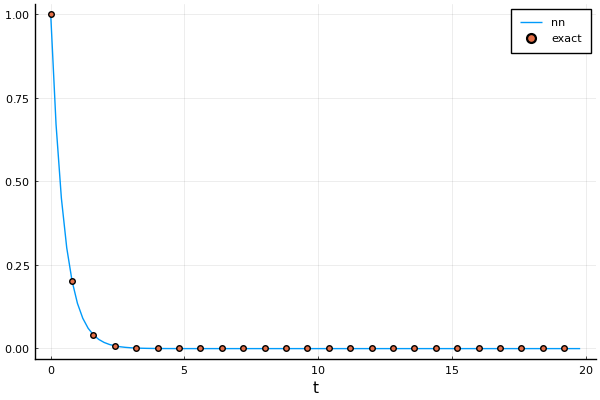

In [22]:
plot(t, u, label="nn", xlabel="t")
scatter!(t[1:4:end], exp.(-2t)[1:4:end], label="exact")